In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import json

import nltk
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

from tqdm import tqdm

In [10]:
from transformers import pipeline

In [11]:
import spacy

# Load nlp model
nlp = spacy.load('en_core_web_sm')

# Load Data

In [12]:
df_main = pd.read_csv('sample-mcd.csv', encoding='latin1')

print(df_main.info())
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewer_id   100 non-null    int64 
 1   review_time   100 non-null    object
 2   review        100 non-null    object
 3   rating        100 non-null    object
 4   review_clean  99 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB
None


,reviewer_id,review_time,review,rating,review_clean
0,1,3 months ago,Why does it look like someone spit on my food?...,1 star,look like someone spit food . normal transacti...
1,2,5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,would mcdonalds . far food atmosphere go . sta...
2,3,5 days ago,Made a mobile order got to the speaker and che...,1 star,make mobile order get speaker check line not m...
3,4,a month ago,My mc. Crispy chicken sandwich was ÃÂ¯ÃÂ¿ÃÂ...,5 stars,mc . crispy chicken sandwich customer service ...
4,5,2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,"repeat order 3 time drive thru , still manage ..."


In [13]:
with open("meta-data.json", "r") as file:
    data = json.load(file)

data

{'0': {'reviewer_id': 1,
  'review_time': '2024-09-06',
  'rating': 1,
  'review': 'Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.',
  'review_processed': "I had a normal transaction, everyone was calm and polite, but now I don't want to eat this. I'm trying not to think about what this milky white/clear substance is all over my food, and I'm sure I'm not coming back.",
  'aspect_sentiment': [{'term': 'food',
    'class': 'negative',
    'probability': [0.9815933108329773,
     0.015454968437552452,
     0.002951699076220393],
    'context': ["I had a normal transaction, everyone was calm and polite, but now I don't want to eat this.",
     "I'm trying not to think about what this milky white/clear substance is all over my food, and I'm sure I'm not coming back."]},
   {'term

In [14]:
df = pd.DataFrame.from_dict(data, orient='index')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewer_id       100 non-null    int64 
 1   review_time       100 non-null    object
 2   rating            100 non-null    int64 
 3   review            100 non-null    object
 4   review_processed  100 non-null    object
 5   aspect_sentiment  100 non-null    object
dtypes: int64(2), object(4)
memory usage: 5.5+ KB
None


,reviewer_id,review_time,rating,review,review_processed,aspect_sentiment
0,1,2024-09-06,1,Why does it look like someone spit on my food?...,"I had a normal transaction, everyone was calm ...","[{'term': 'food', 'class': 'negative', 'probab..."
1,2,2024-12-01,4,It'd McDonalds. It is what it is as far as the...,"The staff at McDonald's are friendly, accommod...","[{'term': 'fast food', 'class': 'positive', 'p..."
2,3,2024-12-01,1,Made a mobile order got to the speaker and che...,I made a mobile order got to the speaker and c...,"[{'term': 'speaker', 'class': 'neutral', 'prob..."
3,4,2024-11-06,5,My mc. Crispy chicken sandwich was ÃÂ¯ÃÂ¿ÃÂ...,"Crispy chicken sandwich was delicious, and cus...","[{'term': 'sandwich', 'class': 'positive', 'pr..."
4,5,2024-10-06,1,"I repeat my order 3 times in the drive thru, a...",I repeat my order three times in the drive thr...,"[{'term': 'fries', 'class': 'negative', 'proba..."


# Exploratory Data Analysis

In [15]:
aspects = {}
text = ""
for items in df['aspect_sentiment'].values:
    for item in items:
        term = item.get('term')
        text = text + term + " " 
        if term not in aspects.keys():
            aspects[term] = 1
        else:
            aspects[term] = aspects[term] + 1
aspects

{'food': 24,
 'substance': 1,
 'fast food': 6,
 'atmosphere': 1,
 'staff': 13,
 'speaker': 2,
 'sandwich': 2,
 'service': 15,
 'customer': 1,
 'crispy chicken sandwich': 2,
 'fries': 9,
 'meal': 8,
 'filet of fish': 1,
 'wait': 5,
 'door': 1,
 'cookies': 1,
 'hamburg': 1,
 'customer service': 5,
 'cup': 1,
 'tea': 2,
 'sweet': 1,
 'coffee': 3,
 'chicken mcnuggets': 1,
 'manager': 8,
 'sauce': 3,
 'chicken': 2,
 'drinks': 2,
 'food items': 1,
 'night crew': 1,
 'morning crew': 1,
 'sausage': 1,
 'egg': 1,
 'syrup': 1,
 'butter': 1,
 'breakfast with hot cakes': 1,
 'utensils': 1,
 'condiments': 1,
 'food burger': 1,
 'drink cups': 1,
 'chicken sandwich': 1,
 'tables': 1,
 'cookie': 1,
 'apples strawberries': 1,
 'bag of food': 1,
 'drink': 4,
 'water': 1,
 'strawberry banana smoothies': 1,
 'smoothie': 1,
 'hash brownsies': 1,
 'appearance': 1,
 'bathrooms': 1,
 'lobby': 1,
 'order taker': 1,
 'morning staff': 1,
 'evening staff': 1,
 'caffeine': 1,
 'money': 1,
 'card': 1,
 'ice cream':

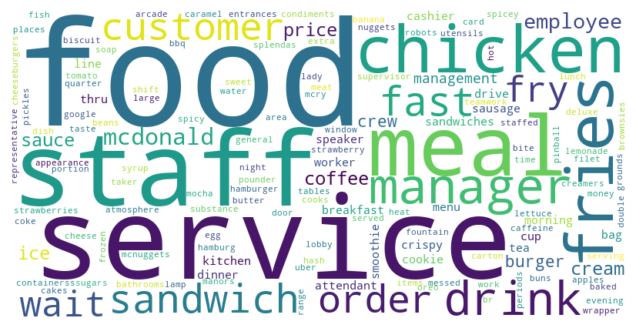

In [16]:
from wordcloud import WordCloud


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
class_aspects = {
    "Food and Menu Items": [
      "food",
      "fast food",
      "fries",
      "meal",
      "sandwich",
      "burger",
      "chicken",
      "hamburg",
      "chicken mcnuggets",
      "filet of fish",
      "crispy chicken sandwich",
      "spicy chicken sandwich",
      "chicken sandwiches",
      "spicey chicken sandwiches",
      "cheeseburgers",
      "burgers",
      "pounder",
      "quarter",
      "double",
      "buns",
      "meat",
      "lettuce and tomato",
      "egg",
      "syrup",
      "breakfast with hot cakes",
      "sausage biscuit",
      "cookies",
      "cookie",
      "ice cream",
      "cream",
      "oreo mcry",
      "apples strawberries",
      "coffee",
      "drink",
      "drinks",
      "tea",
      "water",
      "strawberry banana smoothies",
      "smoothie",
      "caffeine",
      "fountain drinks",
      "coke",
      "frozen lemonade",
      "caramel mocha"
    ],
    "Condiments": [
        "butter",
        "sausage",
        "sauce",
        "bbq sauce",
        "pickles",
        "sugars",
        "creamers",
        "splendas"
    ],
    "Service and Staff": [
        "staff",
        "employees",
        "worker",
        "workers",
        "attendant",
        "attendants",
        "kitchen staff",
        "morning staff",
        "evening staff",
        "crew",
        "supervisor",
        "manager",
        "shift manager",
        "representative",
        "service",
        "customer service",
        "attitude",
        "teamwork",
        "manors",
        "management",
        "time management"
        "employee",
        "cashier",
        "general",
        "night crew",
        "morning crew",
        "lady",
    ],
    "Experience and Environment": [
        "wait",
        "order",
        "orders",
        "drive",
        "drive thru line",
        "thru line",
        "line",
        "door",
        "lobby",
        "appearance",
        "bathrooms",
        "food window",
        "heat lamp",
        "portion",
        "atmosphere",
        "places",
        "entrances",
        "taste",
        "work",
        "served",
        "meal periods",
        "uber",
        "substance",
    ],
    "Packaging": [
        "bag",
        "bag of food",
        "carton",
        "hamburger wrapper",
        "fry containerss",
    ],
    "Pricing and Value": [
        "price",
        "prices",
        "price range"
    ]
}
# Else: Miscellaneous

In [18]:
def get_key(dictionary, value):
    for k, v in dictionary.items():
        if value in v:
            return k
    return 'Miscellaneous'

def generate_topics(dictionary):
    return list(dictionary.keys()) + ['Miscellaneous']

# Table Main

In [19]:
df.head()

,reviewer_id,review_time,rating,review,review_processed,aspect_sentiment
0,1,2024-09-06,1,Why does it look like someone spit on my food?...,"I had a normal transaction, everyone was calm ...","[{'term': 'food', 'class': 'negative', 'probab..."
1,2,2024-12-01,4,It'd McDonalds. It is what it is as far as the...,"The staff at McDonald's are friendly, accommod...","[{'term': 'fast food', 'class': 'positive', 'p..."
2,3,2024-12-01,1,Made a mobile order got to the speaker and che...,I made a mobile order got to the speaker and c...,"[{'term': 'speaker', 'class': 'neutral', 'prob..."
3,4,2024-11-06,5,My mc. Crispy chicken sandwich was ÃÂ¯ÃÂ¿ÃÂ...,"Crispy chicken sandwich was delicious, and cus...","[{'term': 'sandwich', 'class': 'positive', 'pr..."
4,5,2024-10-06,1,"I repeat my order 3 times in the drive thru, a...",I repeat my order three times in the drive thr...,"[{'term': 'fries', 'class': 'negative', 'proba..."


In [20]:
topic_json = {k: 0 for k in list(class_aspects.keys()) + ["Miscellaneous"]}
topic_json

{'Food and Menu Items': 0,
 'Condiments': 0,
 'Service and Staff': 0,
 'Experience and Environment': 0,
 'Packaging': 0,
 'Pricing and Value': 0,
 'Miscellaneous': 0}

**Topic Classification**

In [21]:
# Topic records

records = []
for _, row in df.iterrows():
    record = {'reviewer_id': row['reviewer_id']}
    items = row['aspect_sentiment']
    record.update(topic_json.copy())
    for item in items:
        term = item['term']
        topic = get_key(class_aspects, term)
        record[topic] = 1
    records.append(record)

records

[{'reviewer_id': 1,
  'Food and Menu Items': 1,
  'Condiments': 0,
  'Service and Staff': 0,
  'Experience and Environment': 1,
  'Packaging': 0,
  'Pricing and Value': 0,
  'Miscellaneous': 0},
 {'reviewer_id': 2,
  'Food and Menu Items': 1,
  'Condiments': 0,
  'Service and Staff': 1,
  'Experience and Environment': 1,
  'Packaging': 0,
  'Pricing and Value': 0,
  'Miscellaneous': 0},
 {'reviewer_id': 3,
  'Food and Menu Items': 0,
  'Condiments': 0,
  'Service and Staff': 0,
  'Experience and Environment': 0,
  'Packaging': 0,
  'Pricing and Value': 0,
  'Miscellaneous': 1},
 {'reviewer_id': 4,
  'Food and Menu Items': 1,
  'Condiments': 0,
  'Service and Staff': 1,
  'Experience and Environment': 0,
  'Packaging': 0,
  'Pricing and Value': 0,
  'Miscellaneous': 1},
 {'reviewer_id': 5,
  'Food and Menu Items': 1,
  'Condiments': 0,
  'Service and Staff': 0,
  'Experience and Environment': 0,
  'Packaging': 0,
  'Pricing and Value': 0,
  'Miscellaneous': 0},
 {'reviewer_id': 6,
  'Fo

In [22]:
topic_df = pd.DataFrame.from_dict(records)

topic_df.head()

,reviewer_id,Food and Menu Items,Condiments,Service and Staff,Experience and Environment,Packaging,Pricing and Value,Miscellaneous
0,1,1,0,0,1,0,0,0
1,2,1,0,1,1,0,0,0
2,3,0,0,0,0,0,0,1
3,4,1,0,1,0,0,0,1
4,5,1,0,0,0,0,0,0


**Generate Table per Topic**

In [24]:
def formatting_aspect(items):
    format = ""
    for i, item in enumerate(items):
        term = item.get('term')
        sentiment = item.get('class')
        format += f"● {term}: {sentiment}"
        if i != len(items) - 1:
            format += "\n"
    return format

def generate_table(df: pd.DataFrame, topic_df: pd.DataFrame, topic: str):
    drop = ['review_processed']
    mask = topic_df[topic_df[topic] == 1]['reviewer_id'].values
    result = df[df['reviewer_id'].isin(mask)].copy()
    result['aspect_sentiment'] = result['aspect_sentiment'].apply(formatting_aspect)
    result['topic'] = [topic] * result.shape[0]
    result = result.drop(drop, axis=1).sort_values(by='review_time').reset_index(drop=True)

    return result


topics = generate_topics(class_aspects)
# for topic in topics:
    # temp = generate_table(df, topic_df, topic)
    # temp.to_excel(f"table/main_mcd_{topic}.xlsx", index=False)


# Table Aspects

In [25]:
df.head()

,reviewer_id,review_time,rating,review,review_processed,aspect_sentiment
0,1,2024-09-06,1,Why does it look like someone spit on my food?...,"I had a normal transaction, everyone was calm ...","[{'term': 'food', 'class': 'negative', 'probab..."
1,2,2024-12-01,4,It'd McDonalds. It is what it is as far as the...,"The staff at McDonald's are friendly, accommod...","[{'term': 'fast food', 'class': 'positive', 'p..."
2,3,2024-12-01,1,Made a mobile order got to the speaker and che...,I made a mobile order got to the speaker and c...,"[{'term': 'speaker', 'class': 'neutral', 'prob..."
3,4,2024-11-06,5,My mc. Crispy chicken sandwich was ÃÂ¯ÃÂ¿ÃÂ...,"Crispy chicken sandwich was delicious, and cus...","[{'term': 'sandwich', 'class': 'positive', 'pr..."
4,5,2024-10-06,1,"I repeat my order 3 times in the drive thru, a...",I repeat my order three times in the drive thr...,"[{'term': 'fries', 'class': 'negative', 'proba..."


In [31]:
# Output: id, date, aspect, sentiment, topic
def recording_aspect(row):
    records = []
    id_ = row['reviewer_id']
    date_ = row['review_time']
    items = row['aspect_sentiment']
    
    for item in items:
        aspect = item.get('term')
        aspect = nlp(aspect)[0:].lemma_
        sentiment = item.get('class')
        topic = get_key(class_aspects, aspect)
        records.append({'reviewer_id': id_, 'review_time': date_, 'aspect':aspect, 'sentiment': sentiment, 'topic': topic})
    return records

In [32]:
records = []

for _, row in df.iterrows():
    records += recording_aspect(row)

records

[{'reviewer_id': 1,
  'review_time': '2024-09-06',
  'aspect': 'food',
  'sentiment': 'negative',
  'topic': 'Food and Menu Items'},
 {'reviewer_id': 1,
  'review_time': '2024-09-06',
  'aspect': 'substance',
  'sentiment': 'negative',
  'topic': 'Experience and Environment'},
 {'reviewer_id': 2,
  'review_time': '2024-12-01',
  'aspect': 'fast food',
  'sentiment': 'positive',
  'topic': 'Food and Menu Items'},
 {'reviewer_id': 2,
  'review_time': '2024-12-01',
  'aspect': 'atmosphere',
  'sentiment': 'positive',
  'topic': 'Experience and Environment'},
 {'reviewer_id': 2,
  'review_time': '2024-12-01',
  'aspect': 'food',
  'sentiment': 'positive',
  'topic': 'Food and Menu Items'},
 {'reviewer_id': 2,
  'review_time': '2024-12-01',
  'aspect': 'staff',
  'sentiment': 'positive',
  'topic': 'Service and Staff'},
 {'reviewer_id': 3,
  'review_time': '2024-12-01',
  'aspect': 'speaker',
  'sentiment': 'neutral',
  'topic': 'Miscellaneous'},
 {'reviewer_id': 4,
  'review_time': '2024-1

In [35]:
df_aspect = pd.DataFrame.from_dict(records)

df_aspect.head()

,reviewer_id,review_time,aspect,sentiment,topic
0,1,2024-09-06,food,negative,Food and Menu Items
1,1,2024-09-06,substance,negative,Experience and Environment
2,2,2024-12-01,fast food,positive,Food and Menu Items
3,2,2024-12-01,atmosphere,positive,Experience and Environment
4,2,2024-12-01,food,positive,Food and Menu Items


In [58]:
# Create pivot table
pivot_table = (
    df_aspect.groupby(["review_time", "aspect", "sentiment"])['review_time']
    .count()
    .unstack("sentiment", fill_value=0)
    .sort_values(by='review_time')
).reset_index()

pivot_table['total'] = pivot_table['negative'] + pivot_table['positive'] + pivot_table['neutral']

# pivot_table.to_excel("table/aspect-mcd.xlsx", index=False)

In [33]:
# pd.DataFrame.from_dict(records).to_excel("table/aspect-mcd.xlsx", index=False)

# Prepare Table for SWOT Analysis

In [25]:
swot_json = {k: "" for k in list(class_aspects.keys()) + ["Miscellaneous"]}
swot_json

{'Food and Menu Items': '',
 'Condiments': '',
 'Service and Staff': '',
 'Experience and Environment': '',
 'Packaging': '',
 'Pricing and Value': '',
 'Miscellaneous': ''}

In [26]:
for items in df['aspect_sentiment'].values:
    for item in items:
        if len(item) == 0:
            continue
        term = item.get('term')
        context = item.get('context')
        if len(context) > 0:
            context = context[0]
            class_ = get_key(class_aspects, term)
            if context not in swot_json[class_]:
                swot_json[class_] = swot_json[class_] + "- " + context + "\n"

pd.DataFrame.from_dict(swot_json, 'index', columns=['context']).T

,Food and Menu Items,Condiments,Service and Staff,Experience and Environment,Packaging,Pricing and Value,Miscellaneous
context,"- I had a normal transaction, everyone was cal...",- My 10 pieces of chicken were missing.\n- I w...,"- The staff at McDonald's are friendly, accomm...","- I had a normal transaction, everyone was cal...","- The boy who attended me made me wait, and wh...",- They did not honor there advertised price.\n...,- I made a mobile order got to the speaker and...


PROMPT SUMMARIZE FORMAT:

Descriptive sentiment summary with bullet point format: <text>

# Prepare Table Aspects